# 机器学习期末大作业-Titanic项目实战

## 成员信息

* 车春江18308008 （组长）
* 陈国帆18342008 （组员）
* 刘倍延18342057 （组员）

## 选题背景

[Titanic生存概率预测](https://www.kaggle.com/c/titanic)是Kaggle平台上的经典竞赛项目，泰坦尼克号成员存活的数据集非常适合新手开始作为机器学习项目和Kaggle竞赛的练手。我们将在该项目中探索具备何种特征的人在此次海滩中幸存的几率更高，并通过改建机器学习模型和深度学习模型来预测乘客的生存率。Titanic项目的描述如下所示：

>泰坦尼克号的沉没是历史上最声明远扬的航海事件
>1912年4月15日，在她的处女航中，被广泛认为的“沉没” RMS泰坦尼克号与冰山相撞后沉没。 不幸的是，船上没有足够的救生艇供所有人使用，导致2224名乘客和机组人员中的1502人死亡
>虽然幸存有一些运气，但似乎有些人比其他人更有可能生存
>在这一挑战中，我们要求您建立一个预测模型来回答以下问题：“什么样的人更有可能生存？” 您可以使用乘客数据（即姓名，年龄，性别，社会经济舱等）来进行预测


## 开发环境

* 操作系统：Macos
* Python版本：3.7.4
* Anaconda版本：4.9.2
* tensorflow版本：2.1.0
* keras版本：1.1.0

## 数据源集数据处理

### 数据源

数据集来自Kaggle网站提供的[数据集](https://www.kaggle.com/c/titanic/data?select=test.csv)，Kaggle提供的乘员数据分为两个部分：
* 训练集(train.csv)
* 测试集(test.csv)

训练集将用于构建我们的机器学习/深度学习模型。并且在训练集中对于每位乘客我们会有表示该乘客是否存活的label，也就是`survival`字段。在训练集中会给出每一位乘客的特征，我们需要从这些乘客的特征当中学得一些知识，或者可以使用特征工程来创建新的特征来帮助模型的构建

测试集数据将用来评判我们模型的表现。因此对于测试集中的每一位乘客没有代表该乘客是否存活的label，我们的模型需要根据每一位乘客的特征值来输出相应的label，真实的label将由kaggle网站保留

Kaggle平台还提供了一个`gender_submission.csv`样例文件，我们提交的结果需要与该文件具有相同的形式

### 数据处理

#### 数据初览

在对数据进行处理之前，我们需要先对数据的一些基本信息进行了解

首先将数据从csv文件中独取出来：

In [1]:
import numpy as np
import pandas as pd

train_set = pd.read_csv('./data/titanic/train.csv')
test_set = pd.read_csv("./data/titanic/test.csv")

查看数据集的大小：

In [6]:
print("训练集大小:", train_set.shape)
print("测试集大小:", test_set.shape)

训练集大小: (891, 12)
测试集大小: (418, 11)


然后查看数据的特征值：

In [7]:
print("训练集数据的特征值和label")
print(train_set.head())
print("测试集数据的特征值")
print(test_set.head())

训练集数据的特征值和label
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

不难看出测试集的特征值比起训练值的特征值只缺了一个`survived`特征，其他的特征的含义分别是：

* Survived：0表示未存活，1表示存活
* PassengerId：乘客的编号，在数据库中一般是自增的形式，我们一半不会用该特征进行训练
* Pclass：船票的仓位等级，分为1，2，3三个等级
* Name：乘客名字，可以获取乘客的婚姻、职业等状况
* Sex：性别
* Age：年龄
* SibSp：在船上的同辈亲属的数量：包括丈夫、妻子、兄弟姐妹
* Parch：在船上的不同辈亲属的数量：包括父母，子女
* Ticket：船票的编号
* Cabin：船舱编号
* Embarked：登船的港口

将实验数据和预测数据进行合并，然后查看训练集和测试集数据的分布情况：

In [8]:
full_set=train_set.append(test_set,ignore_index=True)
full_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


查看数据集的non-null数据数量：

In [9]:
full_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


根据上表可以看到，Age,Cabin,Embarked和Fare四项数据有缺失值，并且Cabin字段缺失了接近$\frac{3}{4}$的数据

因为数据集中缺失了大量的数据，因此我们需要对这些字段缺失的数据进行填充，该工作将在稍后进行

#### 探索特征之间的关系

我们可以通过绘制图标来探索特征值之间的关系

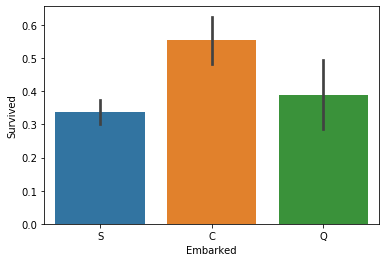

In [2]:
# Embarked与Survived
import seaborn as sns

%matplotlib inline
sns.barplot(data=train_set,x="Embarked",y="Survived")

从上图可以看出，在法国瑟堡登船的乘客生存率较高

然后计算不同类型的Embarked的乘客的生存率为多少：

In [11]:
print('Embarked of S(Southampton):', train_set['Survived'][train_set['Embarked']=='S'].value_counts(normalize=True)[1])
print('Embarked of C(Cherbourg):', train_set['Survived'][train_set['Embarked']=='C'].value_counts(normalize=True)[1])
print('Embarked of Q(Southampton):', train_set['Survived'][train_set['Embarked']=='Q'].value_counts(normalize=True)[1])

Embarked of S(Southampton): 0.33695652173913043
Embarked of C(Cherbourg): 0.5535714285714286
Embarked of Q(Southampton): 0.38961038961038963


我们很容易可以想到，在法国登船的乘客生存率较高可能与其头等舱乘客比例较高有关，因此我们需要探索不同登船地点的乘客对于舱位分布的情况：

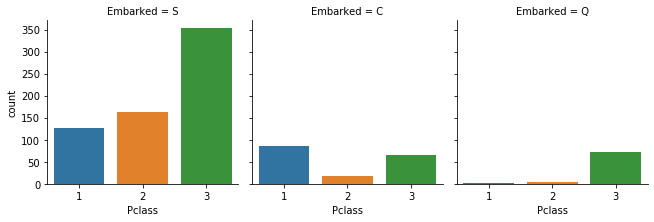

In [12]:
#导入warnings包去除一些没必要的warnings
import warnings 
warnings.filterwarnings('ignore')

sns.factorplot('Pclass',col='Embarked',data=train_set,kind='count',size=3)

从上图我们可以验证我们的猜想，在法国登船的乘客的头等舱乘客所占比例更高

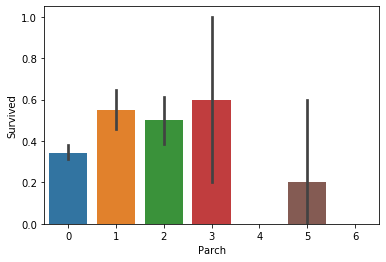

In [13]:
#Parch与Survived
sns.barplot(data=train_set,x="Parch",y='Survived')

在上图可以看出，当与乘客通行的父母和子女数量适中的时候（Parch=3时），生存率较高

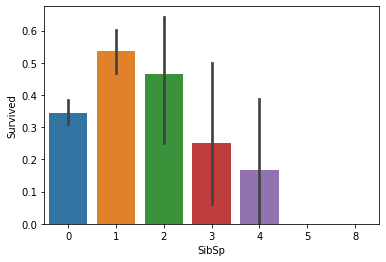

In [14]:
# SibSp与Survived
sns.barplot(data=train_set,x="SibSp",y="Survived")

从上图可以看出，当与乘客通行的同辈亲属数量为1的时候生存率最高

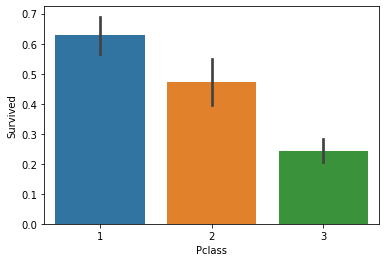

In [15]:
#Pclass与Survived
sns.barplot(data=train_set,x="Pclass",y="Survived")

从上图可以看出，乘客的客舱等级越高，生存率越高，这个也符合我们的直观猜想，等级越高的客舱配置的急救措施也会越好

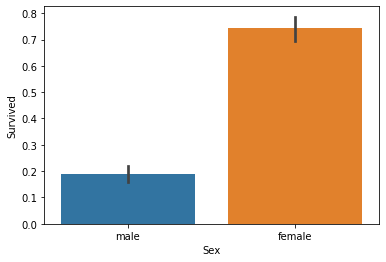

In [16]:
#Sex和Survived
sns.barplot(data=train_set,x="Sex",y="Survived")

从上图我们可以看出女性的生存率远高于男性

In [ ]:
#Age与Survived
age_facet = sns.FacetGrid(train_set,hue='Survived',aspect=3)
age_facet.map(sns.kdeplot,'Age',shade=True)
age_facet.set(xlim=(0,train_set['Age'].max()))
age_facet.add_legend()